In [ ]:
# !pip install bayesian-optimization

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix
from bayes_opt import BayesianOptimization
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('/content/Obesity Dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  107 non-null    object 
 3   Height  107 non-null    float64
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,107.00000,108.000000,108.000000
mean,56.046296,47.481481,166.82243,59.490741,21.382407
std,31.917939,26.996878,27.88447,28.856233,10.712992
min,1.000000,11.000000,120.00000,10.000000,3.900000
25%,28.750000,27.000000,140.00000,35.000000,16.700000
50%,56.500000,42.500000,175.00000,55.000000,21.850000
75%,83.250000,59.250000,190.00000,85.000000,26.100000
max,110.000000,160.000000,210.00000,120.000000,100.000000


In [ ]:
df.isnull().sum()

ID        0
Age       0
Gender    1
Height    1
Weight    0
BMI       0
Label     0
dtype: int64

In [ ]:
df.columns

Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

In [ ]:
df.shape

(108, 7)

In [ ]:
df['Label'].unique()

array(['Normal Weight', 'Overweight', 'Underweight', 'Obese',
       'underweight', 'Normal', 'Under weight', 'obese', 'Over weight',
       'Underwight'], dtype=object)

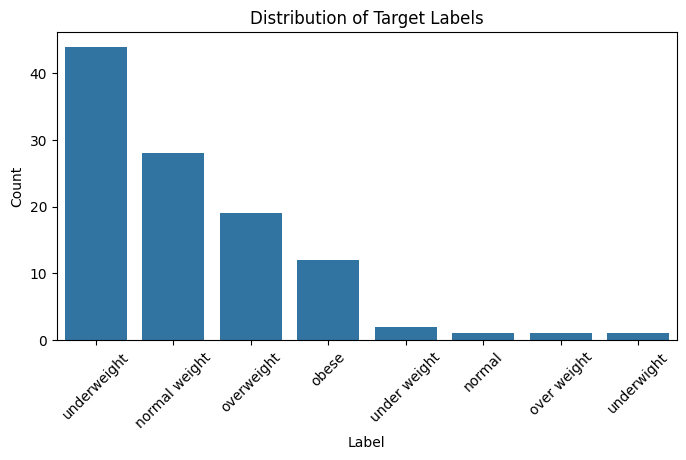

The label 'underweight' has the maximum count of 44.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Label'] = df['Label'].str.lower().str.strip()

# Plotting the distribution of target labels
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Label', order=df['Label'].value_counts().index)
plt.title('Distribution of Target Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.show()

# Finding the label with the maximum occurrences
max_label = df['Label'].value_counts().idxmax()
max_count = df['Label'].value_counts().max()
print(f"The label '{max_label}' has the maximum count of {max_count}.")

In [ ]:
# Count of each category in the 'Label' column
label_counts = df['Label'].value_counts()

print("Count of each category:")
print(label_counts)


Count of each category:
underweight      44
normal weight    28
overweight       19
obese            12
under weight      2
normal            1
over weight       1
underwight        1
Name: Label, dtype: int64


##  Typograpical error exist
-

In [ ]:
# Rename inconsistent label categories
df['Label'] = df['Label'].replace({
    'under weight': 'underweight',
    'normal': 'normal weight',
    'over weight': 'overweight',
    'underwight': 'underweight'
})


In [ ]:
# Count of each category after renaming
label_counts = df['Label'].value_counts()

print("Count of each category after renaming:")
print(label_counts)


Count of each category after renaming:
underweight      47
normal weight    29
overweight       20
obese            12
Name: Label, dtype: int64


In [ ]:
df['Label'] = df['Label'].str.replace('normal weight', 'normalweight')

In [ ]:
label_counts = df['Label'].value_counts()

print("Count of each category after renaming:")
print(label_counts)

Count of each category after renaming:
underweight     47
normalweight    29
overweight      20
obese           12
Name: Label, dtype: int64


In [ ]:
df.isnull().sum()

ID        0
Age       0
Gender    1
Height    1
Weight    0
BMI       0
Label     0
dtype: int64

## Play with Gender

In [ ]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
gender_counts = df['Gender'].value_counts()

print("Count of each category after renaming:")
print(gender_counts)

Count of each category after renaming:
Male      55
Female    52
Name: Gender, dtype: int64


In [ ]:
# Remove rows where 'Gender' is null
df.dropna(subset=['Gender'], inplace=True)


In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

<ipython-input-145-b5fbb534fce0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data=df,palette=custom_palette)


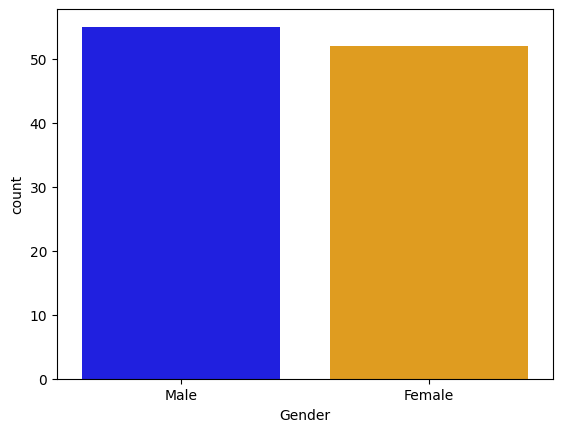

In [ ]:
# male & female check
custom_palette = {'Male': 'blue', 'Female': 'orange'}

sns.countplot(x='Gender',data=df,palette=custom_palette)
plt.show()

In [ ]:
df['Height'].nunique()

10

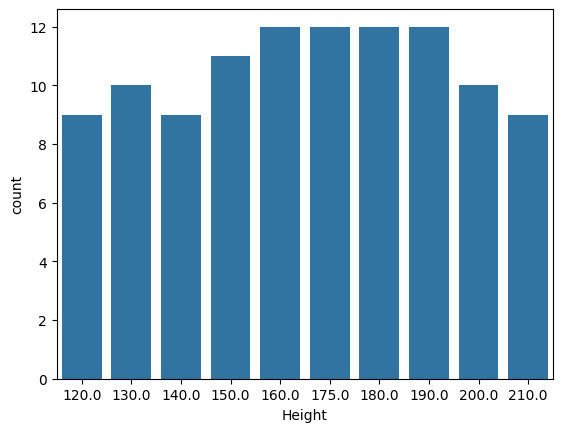

In [ ]:
sns.countplot(x='Height',data=df)
plt.show()

In [ ]:
# Calculate the mean height
df['Height'].mean()


166.41509433962264

In [ ]:
mean_height = df['Height'].mean()

# Replace missing values with the mean height
df['Height'].fillna(mean_height, inplace=True)


In [ ]:
df.isnull().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [ ]:
df.shape

(107, 7)

In [ ]:
df.columns

Index(['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Label'], dtype='object')

In [ ]:
df.head(10)

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175.0,80,25.3,normalweight
1,2,30,Female,160.0,60,22.5,normalweight
2,3,35,Male,180.0,90,27.3,overweight
3,4,40,Female,150.0,50,20.0,underweight
4,5,45,Male,190.0,100,31.2,obese
5,6,50,Female,140.0,40,16.7,underweight
6,7,55,Male,200.0,110,34.2,obese
7,8,60,Female,130.0,30,13.3,underweight
8,9,65,Male,210.0,120,37.2,obese
9,10,70,Female,120.0,20,10.0,underweight


In [ ]:
df.tail(5)

,ID,Age,Gender,Height,Weight,BMI,Label
103,106,11,Male,175.0,10,3.9,underweight
104,107,16,Female,160.0,10,3.9,underweight
105,108,21,Male,180.0,15,5.6,underweight
106,109,26,Female,150.0,15,5.6,underweight
107,110,31,Male,190.0,20,8.3,underweight


In [ ]:
df['Weight']

0       80
1       60
2       90
3       50
4      100
      ... 
103     10
104     10
105     15
106     15
107     20
Name: Weight, Length: 107, dtype: int64

In [ ]:
# Assuming you have a DataFrame 'df' with the 'Weight' column
min_weight = df['Weight'].min()
max_weight = df['Weight'].max()

print(f"The minimum weight is {min_weight}.")
print(f"The maximum weight is {max_weight}.")


The minimum weight is 10.
The maximum weight is 120.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      107 non-null    int64  
 1   Age     107 non-null    int64  
 2   Gender  107 non-null    object 
 3   Height  107 non-null    float64
 4   Weight  107 non-null    int64  
 5   BMI     107 non-null    float64
 6   Label   107 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 6.7+ KB


# Label Encoder

In [ ]:
df['Label'].unique()

array(['normalweight', 'overweight', 'underweight', 'obese'], dtype=object)

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

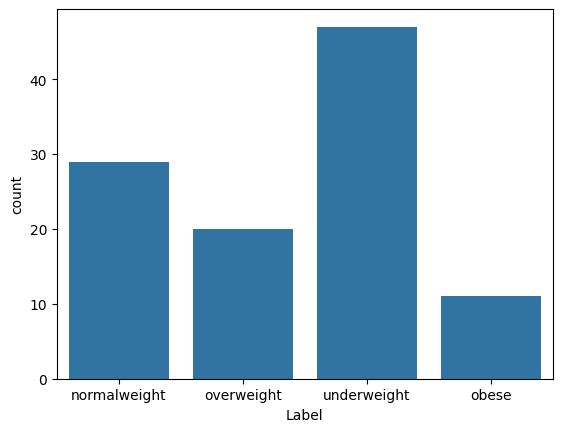

In [ ]:
sns.countplot(x='Label',data=df)
plt.show()

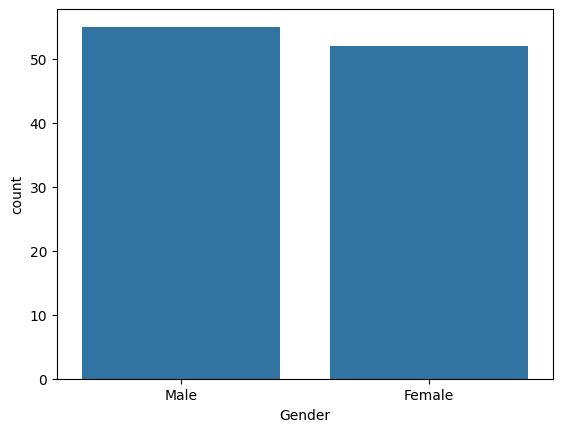

In [ ]:
sns.countplot(x='Gender',data=df)
plt.show()

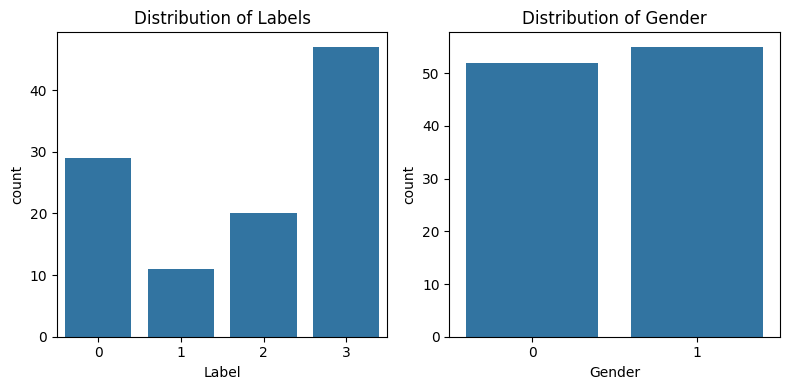

In [ ]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot count plot for 'Label' in the first subplot
sns.countplot(x='Label', data=df, ax=axes[0])
axes[0].set_title('Distribution of Labels')

# Plot count plot for 'Gender' in the second subplot
sns.countplot(x='Gender', data=df, ax=axes[1])
axes[1].set_title('Distribution of Gender')

# Adjust layout
plt.tight_layout()

plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode categorical variables
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Label'] = label_encoder.fit_transform(df['Label'])

# Display the updated DataFrame
print(df.head())


   ID  Age  Gender  Height  Weight   BMI  Label
0   1   25       1   175.0      80  25.3      0
1   2   30       0   160.0      60  22.5      0
2   3   35       1   180.0      90  27.3      2
3   4   40       0   150.0      50  20.0      3
4   5   45       1   190.0     100  31.2      1


In [ ]:
df['Label'].unique()


array([0, 2, 3, 1])

<ipython-input-177-8985b2749a6a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, ax=axes[0],palette=custom_palette,legend=True)
<ipython-input-177-8985b2749a6a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, ax=axes[1],palette=custom_palette1)


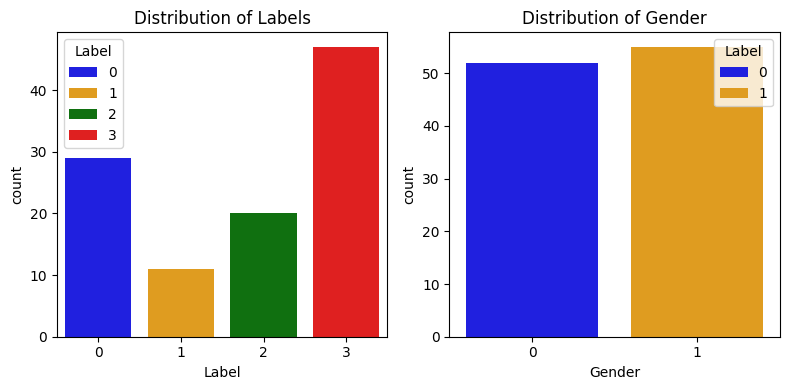

In [ ]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
custom_palette1 = {'0': 'blue', '1': 'orange'}
custom_palette = {'0': 'blue', '1': 'orange', '2': 'green', '3': 'red'}
# Plot count plot for 'Label' in the first subplot
sns.countplot(x='Label', data=df, ax=axes[0],palette=custom_palette,legend=True)
axes[0].set_title('Distribution of Labels')
axes[0].legend(title='Label', labels=['0', '1','2','3'])
# Plot count plot for 'Gender' in the second subplot
sns.countplot(x='Gender', data=df, ax=axes[1],palette=custom_palette1)
axes[1].set_title('Distribution of Gender')
axes[1].legend(title='Label', labels=['0', '1'])

# Adjust layout
plt.tight_layout()

plt.show()
